In [ ]:
"""
    shap.ipynb
    Author: Anuvrat
    Date: 14th August 2024
    Purpose: Uses SHAP to explain feature importance for tree ensemble models

    Github ticket: NA
"""

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import joblib

In [27]:
# Display all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Disable scientific notation
pd.options.display.float_format = "{:.2f}".format

In [28]:
# Load the data
data = pd.read_pickle("../data/BRFSS2022_modeling_data.pkl")
# data.head()

In [29]:
# Load the model
clf_lr = joblib.load(".././models/lr_model.pkl")
clf_rf = joblib.load(".././models/rf_model.pkl")
clf_xgb = joblib.load(".././models/xgb_model.pkl")
clf_lgbm = joblib.load(".././models/lgbm_model.pkl")

In [30]:
# Train-test split
X = data.drop(columns=["CVDINFR4"])
y = data["CVDINFR4"]

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Assigning Test data
X_test = X_test_raw 
y_test = y_test_raw

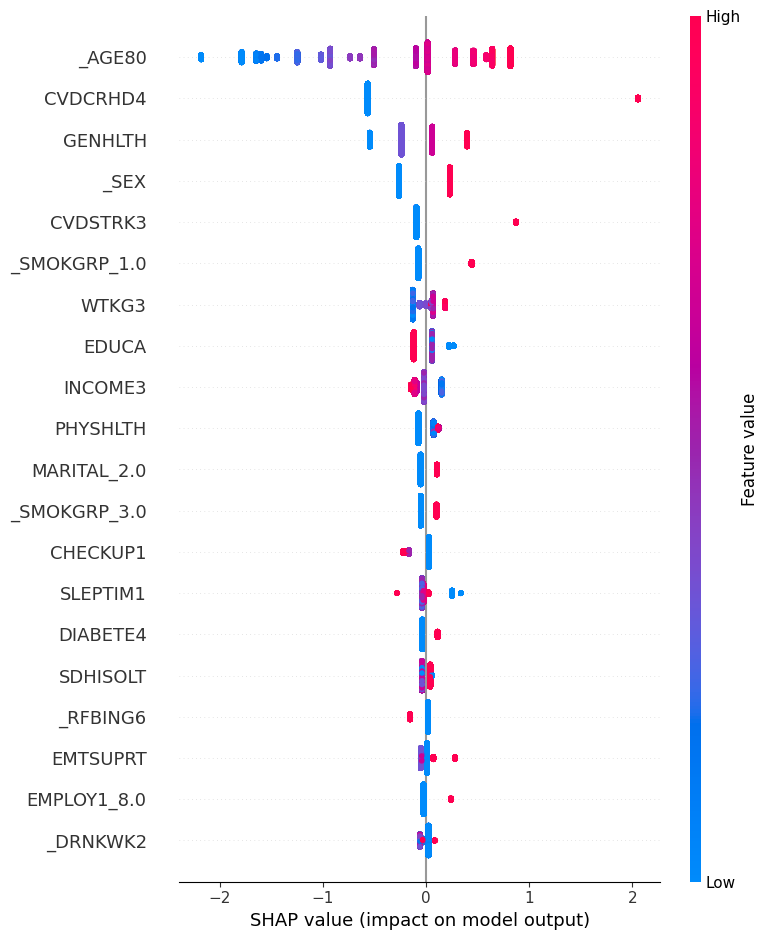

In [18]:
# Shapley analysis with values and plot - XGB
shap.initjs()
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test, feature_names=X.columns) #plot_type="bar"

c:\Users\Anuvrat\OneDrive\Documents\siads\capstone\venv_capstone\Lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


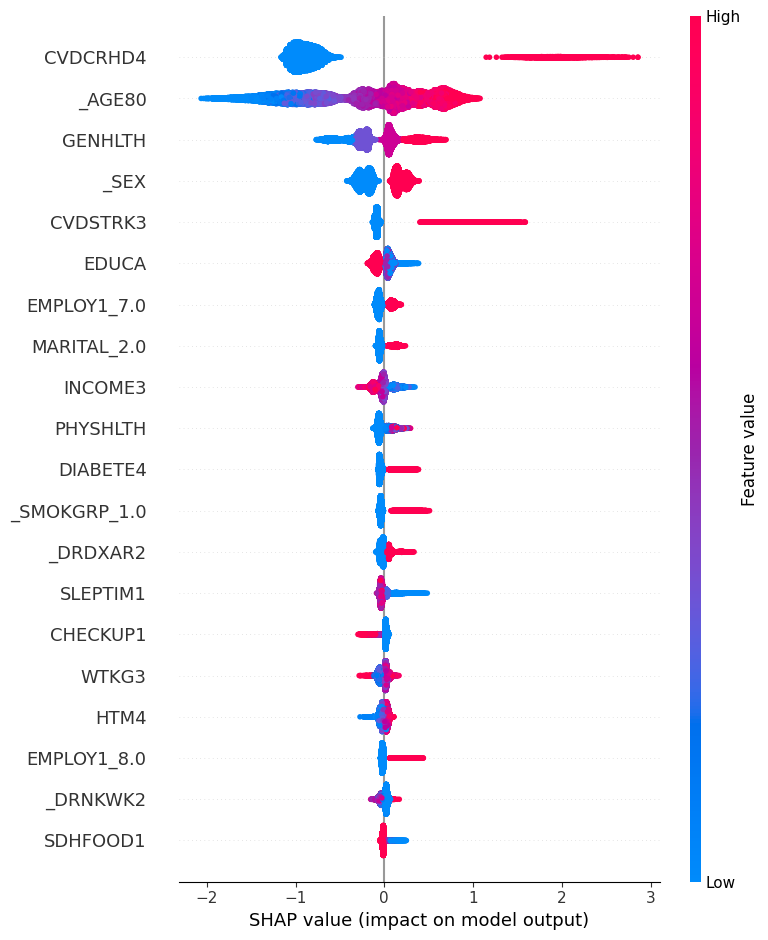

In [32]:
# Shapley analysis with values and plot - LGBM
shap.initjs()
explainer = shap.TreeExplainer(clf_lgbm)
shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test, feature_names=X.columns, title="Feature importance explanation for LGBM model") #plot_type="bar"

In [ ]:
# Shapley plot with feature names and values as data labels
#shap.summary_plot(shap_values, X_test, feature_names=X.columns) #plot_type="bar"